# Math 428 - Homework for 04/17/19

# Collin Heist

## Local Truncation Error Estimation

### Implementation of the Runge-Kutta Fehlberg Method

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas import *

# Runge-Kutta Fehlberg approximation of a DE
def rk_fehlberg(dy_dx, initial=[0, 0], x_bounds=[0, 0], h=0.1):
    x, y = [initial[0]], [initial[1]]
    y_err = [0]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1]
        k1 = dy_dx(x_n, y_n)
        k2 = dy_dx(x_n + 1/5 * h, y_n + 1/5 * k1 * h)
        k3 = dy_dx(x_n + 3/10 * h, y_n + 3/40 * k1 * h + 9/40 * k2 * h)
        k4 = dy_dx(x_n + 3/5 * h, y_n + 3/10 * k1 * h - 9/10 * k2 * h + 6/5 * k3 * h)
        k5 = dy_dx(x_n + h, y_n - 11/54 * k1 * h + 5/2 * k2 * h - 70/27 * k3 * h + 35/27 * k4 * h)
        k6 = dy_dx(x_n + 7/8 * h, y_n + 1631/55296 * k1 * h + 175/512 * k2 * h + 575/13824 * k3 * h + 44275/110592 * k4 * h + 253/4096 * k5 * h)
        
        x.append(x_bounds[0] + i * h)
        y_next_4th = y_n + h * (37/378 * k1 + 250/621 * k3 + 125/594 * k4 + 512/1771 * k6)
        y_next_5th = y_n + h * (2825/27648 * k1 + 18575/48384 * k3 + 13535/55296 * k4 + 277/14336 * k5 + 1/4 * k6)
        y.append(y_next_5th)
        y_err.append(abs(y_next_4th - y_next_5th)) # Compute the error between the predictions
        
    return x, y, y_err

In [2]:
# The given f(x, y)
def dy_dx(x, y):
    return 1 + y * y

# The analytical solution to the differential equation
def y_sol(x_vals):
    return np.asarray([np.tan(np.pi / 4 + x) for x in x_vals])

### The RK Fehlberg method with one step

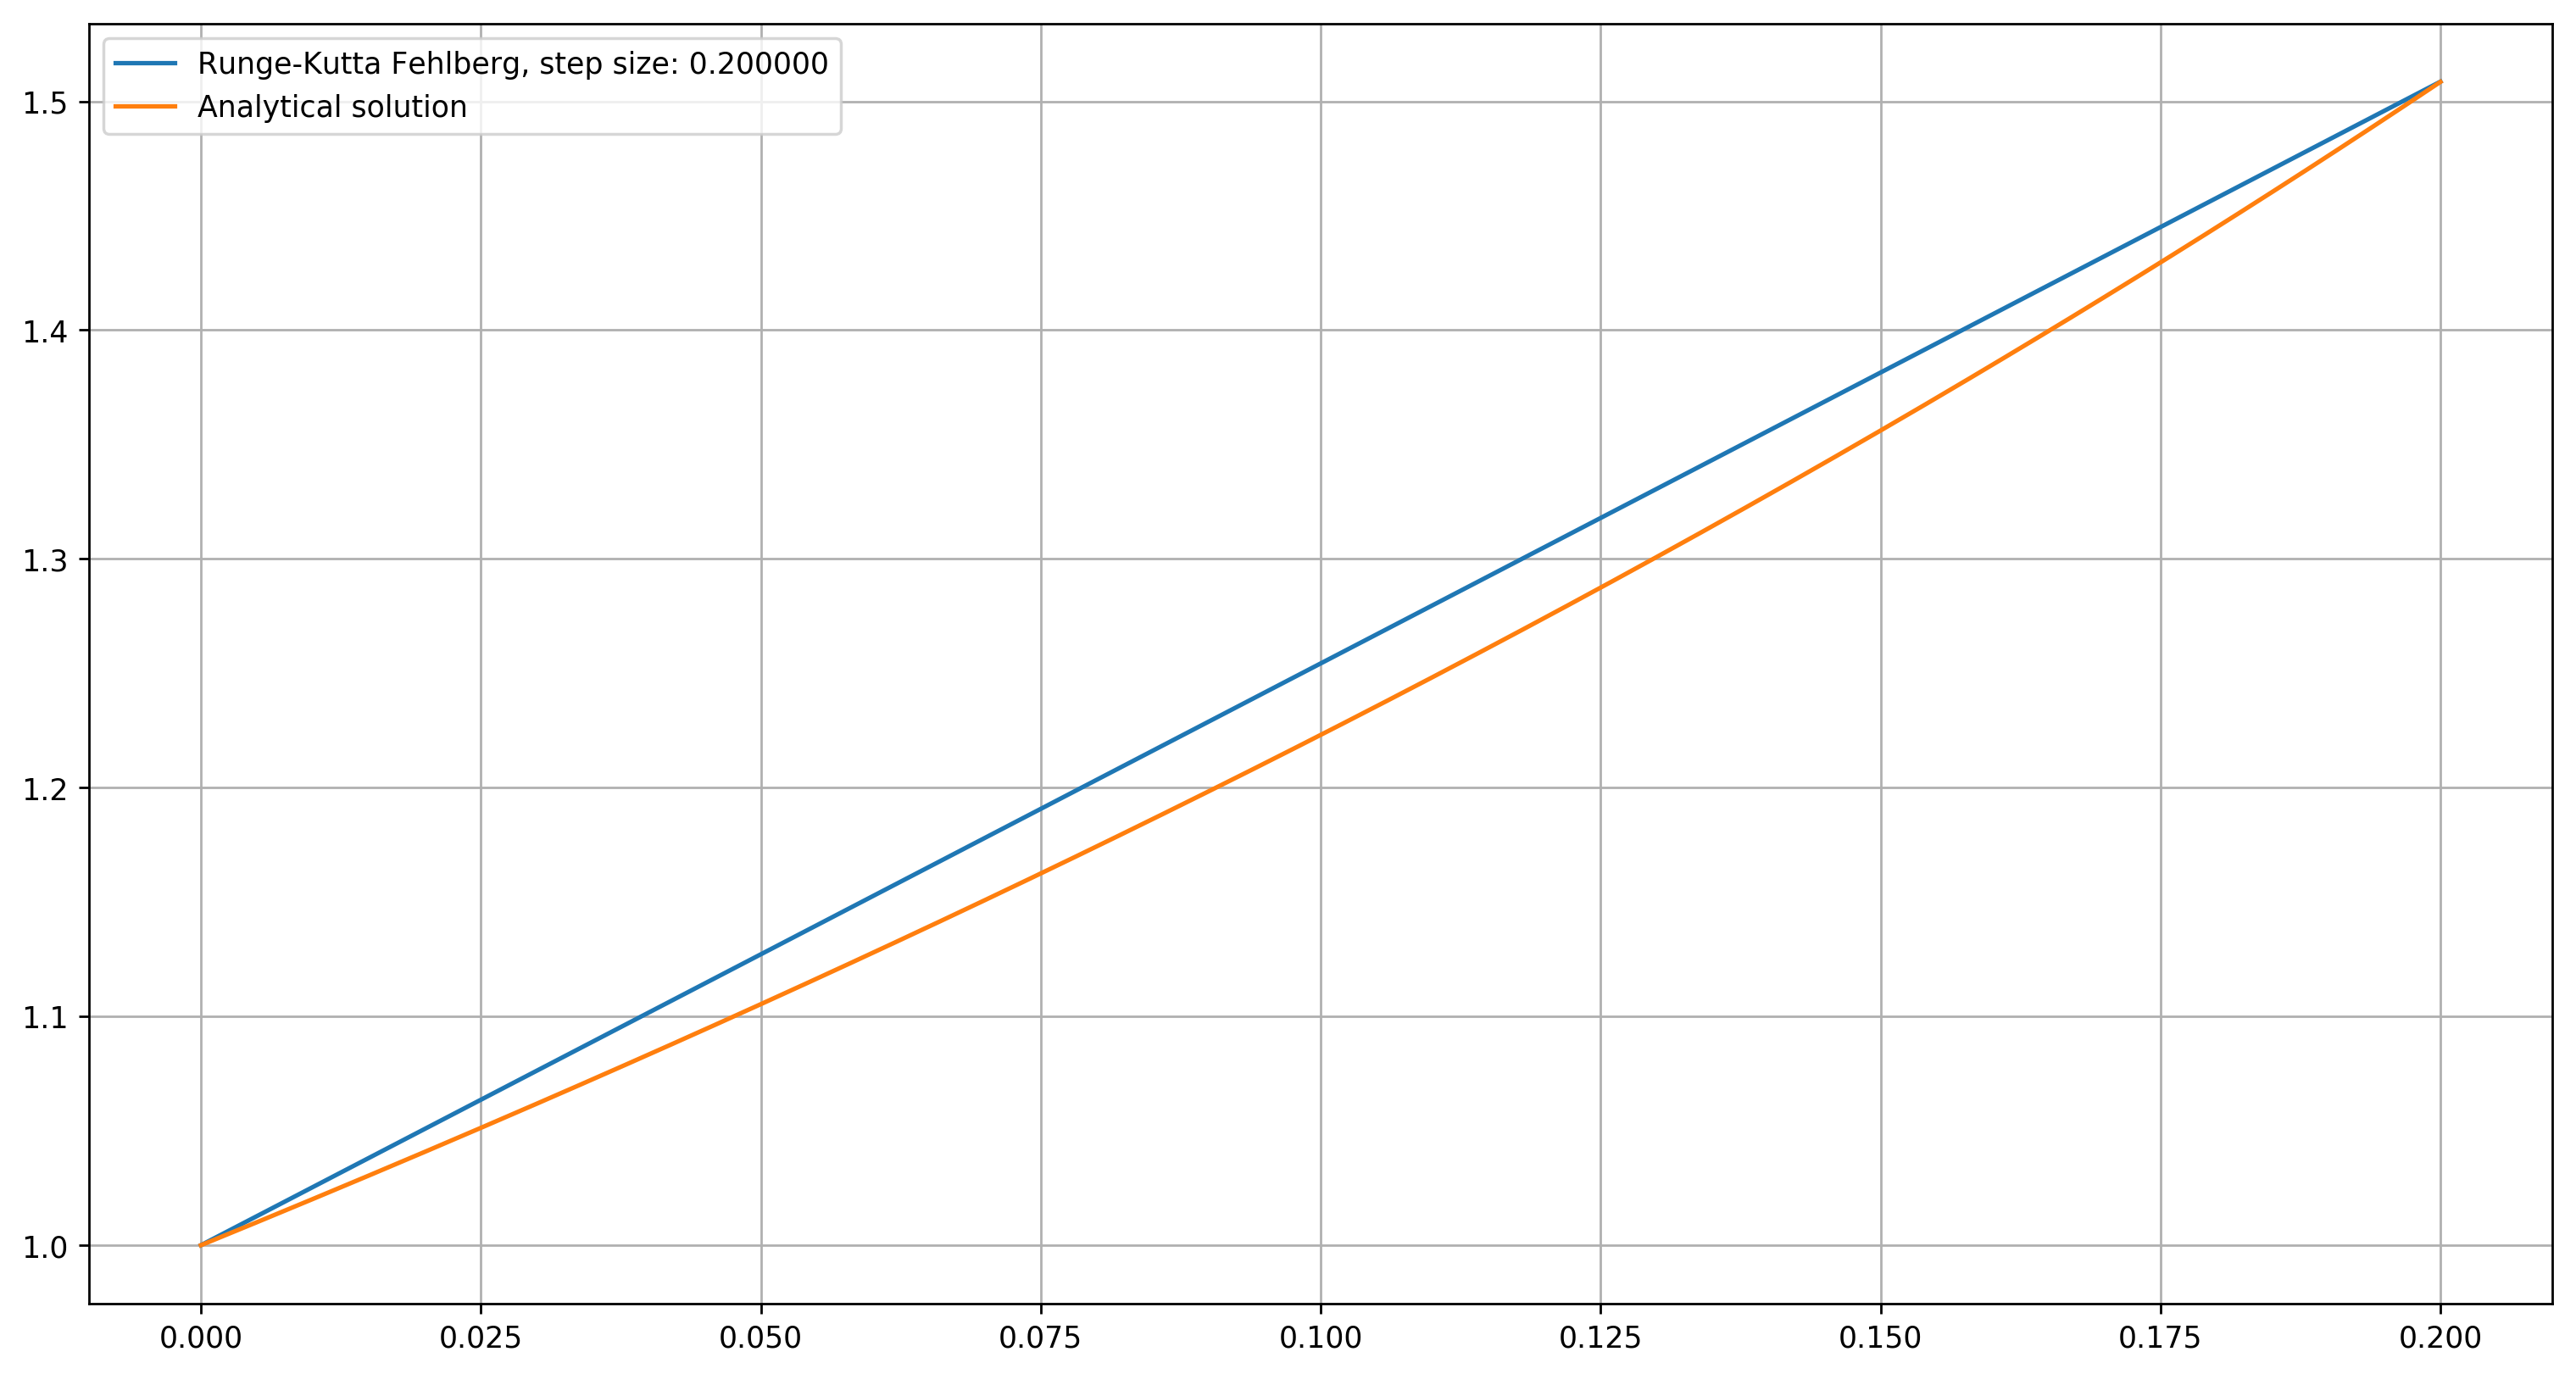

In [3]:
felberg_h = 0.2
x, y, err = rk_fehlberg(dy_dx, [0, 1], [0, 0.2], felberg_h)
err_large_step = DataFrame([e * 10 ** 6 for e in err])

plt.figure(figsize=(15, 8), dpi=250)
plt.plot(x, y, label="Runge-Kutta Fehlberg, step size: %f" % felberg_h)
plt.plot(np.arange(0, 0.2 + 0.001, 0.001),
         y_sol(np.arange(0, 0.2 + 0.001, 0.001)), label="Analytical solution")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### The RK Fehlberg method with two steps

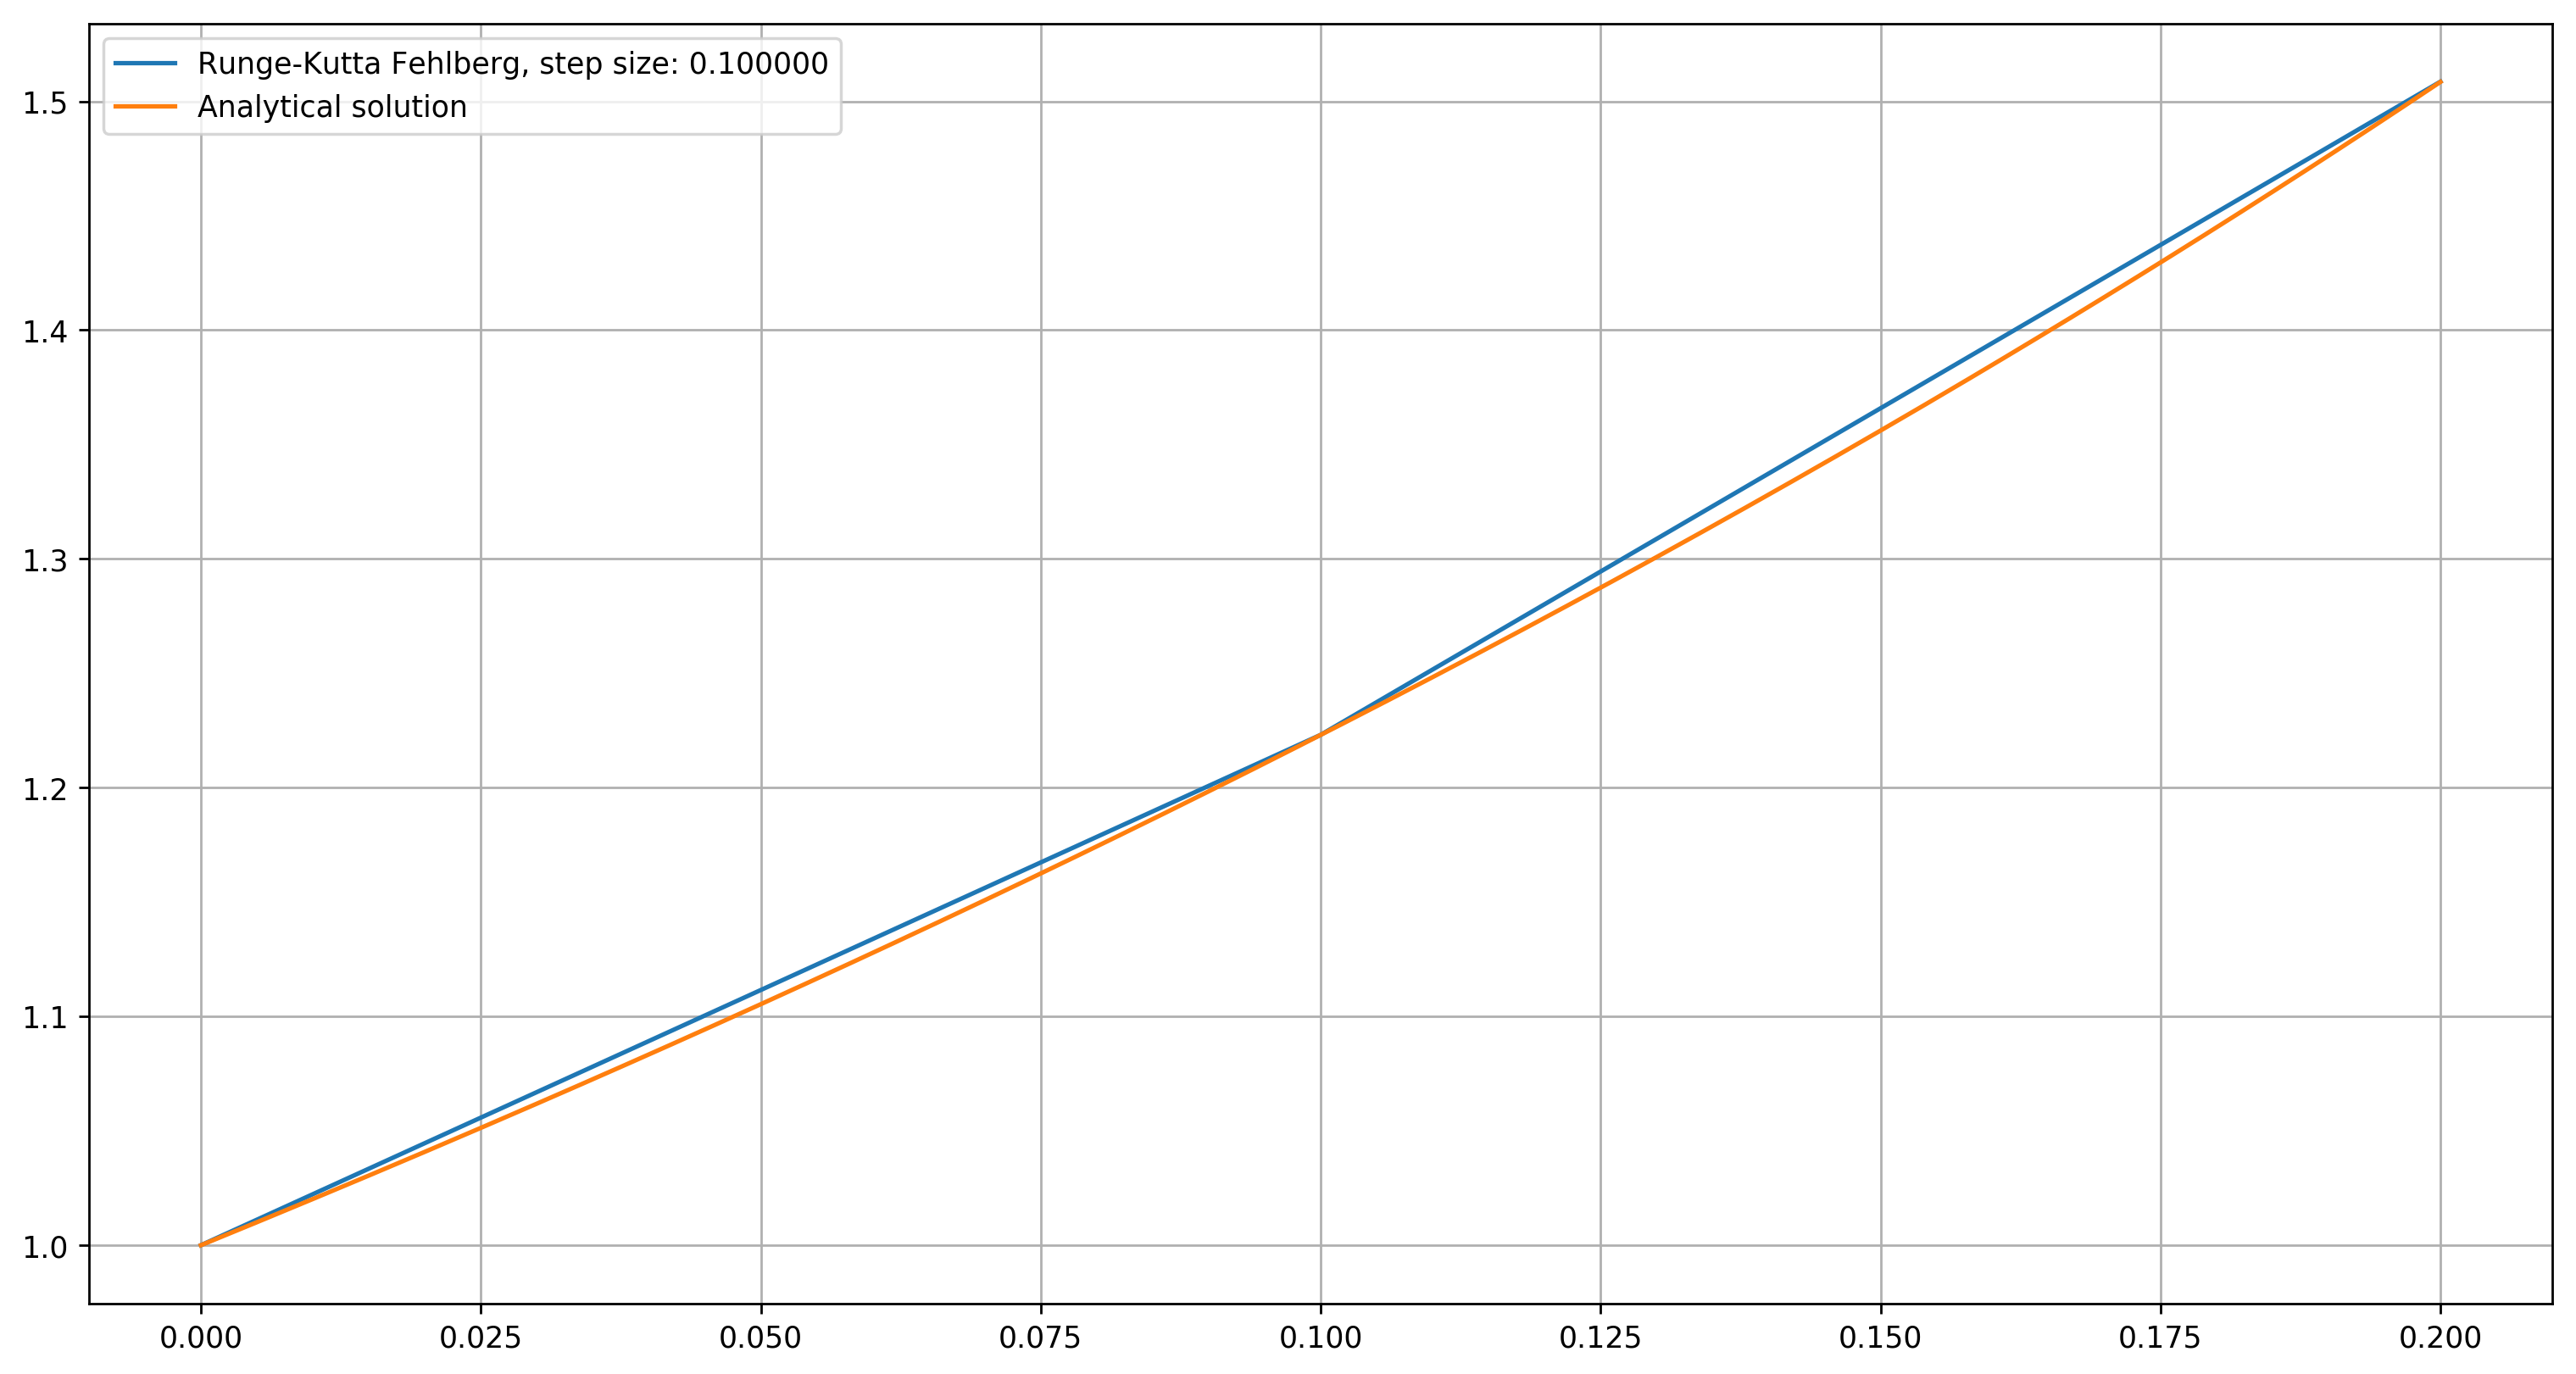

In [4]:
felberg_h = 0.1
x, y, err = rk_fehlberg(dy_dx, [0, 1], [0, 0.2], felberg_h)
err_small_step = DataFrame([e * 10 ** 6 for e in err])

plt.figure(figsize=(15, 8), dpi=250)
plt.plot(x, y, label="Runge-Kutta Fehlberg, step size: %f" % felberg_h)
plt.plot(np.arange(0, 0.2 + 0.001, 0.001),
         y_sol(np.arange(0, 0.2 + 0.001, 0.001)), label="Analytical solution")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### Comparison of the LTE between the two uses of the RK Fehlberg method
Now to compare the local truncation error when using the same method, but with different step sizes (the values of the LTE are scaled to make the differences more easier to visualize):

In [5]:
print ("Large step sizes: \n", err_large_step, "\n\nSmall step sizes:\n", err_small_step)

Large step sizes: 
          0
0   0.0000
1  87.6902 

Small step sizes:
            0
0   0.000000
1  40.964498
2  52.476057


Clearly, the average local truncation error for the Runge-Kutta Fehlberg method _decreases_ with smaller step sizes. This is logically consistent with an intuitive understanding of how local truncation error is accumulated. For smaller steps, the RK Fehlberg method more closely resembles the analytical solution to the equation. Therefore, smaller and smaller steps should (and do) decrease the LTE at each step. Visually, this is an obvious effect in both of the above graphs; where the estimated function more closely matches the analytical solution of the range of x values, and that difference between the two is (in part) the LTE. 

This effect is demonstrated with very small step sizes below (once again with the values of the LTE scaled by $10^6$ for easier visualization). Only the first 10 values of each list are shown.

In [6]:
felberg_h = 0.01
x_01, y_01, err_01 = rk_fehlberg(dy_dx, [0, 1], [0, 0.2], felberg_h)
err_01 = DataFrame([e * 10 ** 6 for e in err_01])
x_001, y_001, err_001 = rk_fehlberg(dy_dx, [0, 1], [0, 0.2], felberg_h / 10)
err_001 = DataFrame([e * 10 ** 6 for e in err_001])
x_0001, y_0001, err_0001 = rk_fehlberg(dy_dx, [0, 1], [0, 0.2], felberg_h / 100)
err_0001 = DataFrame([e * 10 ** 6 for e in err_0001])

print ("Step size 0.01: \n", err_01[:11],
       "\n\nStep size 0.001:\n", err_001[:11],
       "\n\nStep Size 0.0001:\n", err_0001[:11])

Step size 0.01: 
            0
0   0.000000
1   3.660827
2   3.736457
3   3.815228
4   3.897303
5   3.982861
6   4.072092
7   4.165197
8   4.262396
9   4.363920
10  4.470020 

Step size 0.001:
            0
0   0.000000
1   0.362124
2   0.362851
3   0.363581
4   0.364313
5   0.365049
6   0.365787
7   0.366529
8   0.367273
9   0.368021
10  0.368771 

Step Size 0.0001:
            0
0   0.000000
1   0.036173
2   0.036181
3   0.036188
4   0.036195
5   0.036202
6   0.036210
7   0.036217
8   0.036224
9   0.036231
10  0.036239


As discussed above, by reducing the step size for our methods, the LTE is reduced as well. I've scaled the values by $10^6$ to make the effect easier, but for a step-size reduction of 100 times, the difference between the first and last set of local error is reduced by even more than 100 times it's 'original' value. Although I've only shown the first 10 values, this persists for all values of the estimation.